In [2]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [4]:
plt.style.use('ggplot')

# Load Data

In [5]:
# Load data
npz = np.load('./my_comp_train_XY.npz')
X_train = npz['X']
y_train = npz['y']

In [18]:
X_train_flatten = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_train_flatten = X_trian_flatten / 255.
print(X_train_flatten.shape)

(45477, 784)


# PCA

## Fit PCA

In [7]:
# Fit PCA
pca_linear = PCA()
pca_linear.fit(X_trian_flatten)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# Show few values for explain contribution
pca_linear.explained_variance_ratio_[:10]

array([0.08815273, 0.06922403, 0.06276598, 0.05656619, 0.04860949,
       0.04367156, 0.0321418 , 0.02952697, 0.02733348, 0.02359142])

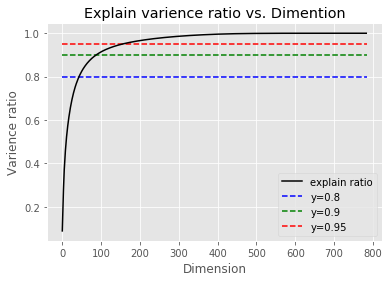

In [9]:
# Plor explain varience ratio
explain_cum = np.cumsum(pca_linear.explained_variance_ratio_)
plt.plot(explain_cum, color="black", label="explain ratio")
plt.hlines(0.8, 0, 784, linestyles="dashed", label="y=0.8", color="b")
plt.hlines(0.9, 0, 784, linestyles="dashed", label="y=0.9", color="g")
plt.hlines(0.95, 0, 784, linestyles="dashed", label="y=0.95", color="r")
plt.legend()
plt.title("Explain varience ratio vs. Dimention")
plt.xlabel("Dimension")
plt.ylabel("Varience ratio")
plt.show()

In [10]:
# Get dimention depending on explain varience
boundary_dimention = {
    0.8:  np.argmax(explain_cum >= 0.8),
    0.9:  np.argmax(explain_cum >= 0.90),
    0.95: np.argmax(explain_cum >= 0.95)
    }
print(boundary_dimention)

{0.8: 44, 0.9: 88, 0.95: 155}


**Note** <br>
We probably can decrease dimension to 44 at most 

## 2D map of data

In [26]:
# Extract most important 2D from data
X_train_pca = pca_linear.transform(X_trian_flatten)
X_train_pca_2D = X_train_pca[:, :2]
print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("X_train_pca_2D.shape: {}".format(X_train_pca_2D.shape))

X_train_pca.shape: (45477, 784)
X_train_pca_2D.shape: (45477, 2)


In [40]:
# Create DataFrame with extracted 2D data and Label
train_2D = pd.DataFrame(np.c_[X_train_pca_2D, y_train], columns=["X1", "X2", "Y"])
train_2D["Y"] = train_2D["Y"].astype('int')
train_2D.head()

,X1,X2,Y
0,6.113590,1.246698,0
1,3.990467,2.126604,0
2,0.531164,0.904874,0
3,4.731935,-1.633302,0
4,0.443380,1.876495,0


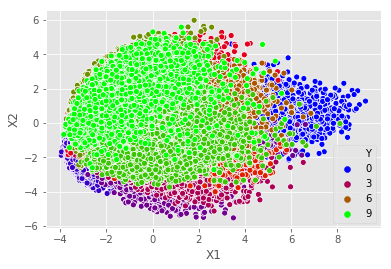

In [41]:
# Plot all data
sns.scatterplot(data=train_2D, x="X1", y="X2", hue="Y",
                palette="brg")

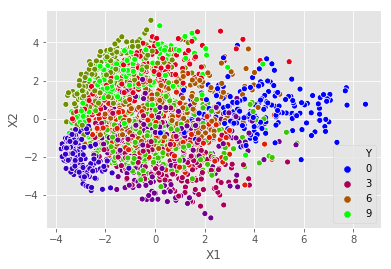

In [45]:
# Plot 5% of the data to see the boundary clearly
sns.scatterplot(data=train_2D.sample(len(train_2D)//20), x="X1", y="X2", hue="Y",
                palette="brg")

## Compare effect on PCA

In [14]:
# Define model using pipeline
model = Pipeline([
    ["preprocessor", PCA()],
    ["estomator", SVC(kernel="rbf")],
])

In [15]:
# Params for gridssearch
params = {
    "preprocessor__n_components": [
        784, 500, 300, 200, 100, 50, 10
    ]
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(model, params, cv=3)
grid_search.fit(X_train_flatten, y_train)

/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sampeimasato/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  

In [ ]:
# Resutls
results = grid_search.cv_results_

# t-SNE

## Fit TSNE

In [49]:
t_sne = TSNE(n_components=2)
train_2D_tsne = t_sne.fit_transform(X_trian_flatten)

array([[ 33.34448 ,  29.909739],
       [ 25.986513,  22.773048],
       [ 32.99609 ,  16.238438],
       ...,
       [-12.605912, -53.952065],
       [-11.013116, -28.94097 ],
       [-10.535539, -44.856525]], dtype=float32)

## Map 2D data

In [50]:
train_2D_tsne

NameError: name 'train_2D_tsne' is not defined